In [2]:
import json
import pandas as pd
import numpy as np
import networkx as nx
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from math import log
import statistics as st
from lattice_reference import *
from joblib import Parallel, delayed
import os
 
threads = os.cpu_count()

In [3]:
target = "dhdk"
G = nx.read_gml("../data/{0}/{0}_coauthorship_network.gml".format(target))
node_attributes = nx.get_node_attributes(G, "affiliation")


## Descriptive Statistics

In [4]:
#number of nodes, edges, and average degree.

In [5]:
#distribution of edge weights

---

# Centrality measures

### Degree Centrality

Degree Centrality:
Reflects the number of connections a node has.
"TOMASI, FRANCESCA" has the highest degree centrality, implying that this person has the most direct connections.

In [6]:
degree_centrality = nx.degree_centrality(G)
dc_data = pd.DataFrame({"Name": list(degree_centrality.keys()),
                        "Affiliation": [node_attributes[node] for node in degree_centrality.keys()],
                        "DegreeCentrality": list(degree_centrality.values())
                        }).sort_values(by="DegreeCentrality", ascending=False).reset_index(drop=True)

dc_data.head(10)

Name                                        Affiliation  \
0  TOMASI, FRANCESCA  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
1     PERONI, SILVIO  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
2    MILANO, MICHELA  DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...   
3      VITALI, FABIO  DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...   
4  BARTOLINI, ILARIA  DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...   
5  DAQUINO, MARILENA  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
6      GANGEMI, ALDO          DIPARTIMENTO DI FILOSOFIA E COMUNICAZIONE   
7  PALMIRANI, MONICA                 DIPARTIMENTO DI SCIENZE GIURIDICHE   
8   TAMBURINI, FABIO  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
9     PATELLA, MARCO  DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...   

   DegreeCentrality  
0          0.214106  
1          0.188917  
2          0.166247  
3          0.138539  
4          0.123426  
5          0.120907  
6          0.108312  
7          0.100756  
8          0.098237  
9          0.085642

### Betweenness Centrality

Betweenness Centrality:
High values suggest that the node plays a critical role in connecting other nodes in the network:
"TOMASI, FRANCESCA" has the highest betweenness centrality, indicating that this individual's presence is crucial for maintaining connectivity between other nodes.


In [7]:
weighted_betweenness_centrality = nx.betweenness_centrality(G, weight="weight")

wbc_data = pd.DataFrame({"Name": list(weighted_betweenness_centrality.keys()),
                        "Affiliation": [node_attributes[node] for node in weighted_betweenness_centrality.keys()],
                        "WeightedBetweennessCentrality": list(weighted_betweenness_centrality.values())
                        }).sort_values(by="WeightedBetweennessCentrality", ascending=False).reset_index(drop=True)

wbc_data.head(10)

Name                                        Affiliation  \
0    TOMASI, FRANCESCA  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
1    BARTOLINI, ILARIA  DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...   
2      MILANO, MICHELA  DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...   
3         DUCA, SILVIA  APPC - AREA PIANIFICAZIONE, PROGRAMMAZIONE E C...   
4  PRESUTTI, VALENTINA  DIPARTIMENTO DI LINGUE, LETTERATURE E CULTURE ...   
5        VIALE, MATTEO  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
6        VITALI, FABIO  DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...   
7       PERONI, SILVIO  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
8      NISSIM, MALVINA  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
9      SOLMI, RICCARDO                                               None   

   WeightedBetweennessCentrality  
0                       0.365687  
1                       0.310429  
2                       0.157211  
3                       0.138348  
4                       0.123821  
5                       0.111866  
6                       0.105919  
7                       0.097948  
8                       0.093904  
9                       0.092940

### Closeness Centrality

Without Edge Weights:
TOMASI, FRANCESCA (0.420055): This node has the highest closeness centrality. It is, on average, closer to other nodes in the network compared to the rest.

PERONI, SILVIO (0.394565): The second-highest closeness centrality. Similar interpretation to TOMASI, FRANCESCA.

Low Closeness Centralities: Nodes like PICCININI, ALESSANDRO, IOVINE, GIULIO, CAPUCCINO, CARLOTTA, LILLO, FABRIZIO, TRAPIN, LUCA have relatively low closeness centrality. These nodes are less central in terms of proximity to other nodes.

With Edge Weights:
TOMASI, FRANCESCA (0.184239): Despite having the highest closeness centrality without weights, its closeness decreases when considering edge weights. The weights indicate that the paths to other nodes may be longer or have higher costs.

DUCA, SILVIA (0.172527): DUCA, SILVIA becomes more central when edge weights are considered. It suggests that, with weights, DUCA, SILVIA is closer to other nodes.

PRESUTTI, VALENTINA (0.168067): Similar to DUCA, SILVIA, PRESUTTI, VALENTINA becomes more central when considering edge weights.

Why it Changes:
Edge Weights Influence Path Selection:

With edge weights, longer paths may be preferred if they have lower weights. This can lead to different paths being selected as the "shortest," altering closeness centrality.
Higher Edge Weights Increase Distance:

Higher edge weights effectively increase the distance between nodes. If a path has a high weight, it contributes more to the overall distance in the weighted network.
Connection Strength Matters:

Edge weights capture the strength or importance of connections. Nodes with strong connections (lower weights) may have higher closeness centrality in the weighted network.
Impact on Spread of Information:

Closeness centrality measures how quickly information can spread. If weighted edges represent communication strength, the weighted closeness reflects how quickly information can traverse strong connections.
In essence, the inclusion of edge weights adjusts the notion of "closeness" to consider the strength or cost associated with traversing edges. This adjustment can lead to changes in the ranking of nodes' closeness centrality.

In [8]:
weighted_closeness_centrality = nx.closeness_centrality(G, distance="weight")

wcc_data = pd.DataFrame({"Name": list(weighted_closeness_centrality.keys()),
                        "Affiliation": [node_attributes[node] for node in weighted_closeness_centrality.keys()],
                        "WeightedClosenessCentrality": list(weighted_closeness_centrality.values())
                        }).sort_values(by="WeightedClosenessCentrality", ascending=False).reset_index(drop=True)

wcc_data.head(10)

Name                                        Affiliation  \
0    TOMASI, FRANCESCA  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
1         DUCA, SILVIA  APPC - AREA PIANIFICAZIONE, PROGRAMMAZIONE E C...   
2  PRESUTTI, VALENTINA  DIPARTIMENTO DI LINGUE, LETTERATURE E CULTURE ...   
3        VIALE, MATTEO  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
4      SOLMI, RICCARDO                                               None   
5      NISSIM, MALVINA  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
6         VAYRA, MARIO                                               None   
7    BARTOLINI, ILARIA  DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...   
8        CAPACI, BRUNO  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
9   MODESTI, MADDALENA  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   

   WeightedClosenessCentrality  
0                     0.184239  
1                     0.172527  
2                     0.168067  
3                     0.165659  
4                     0.165133  
5                     0.161543  
6                     0.161459  
7                     0.160134  
8                     0.155274  
9                     0.155043

### Eigenvector centrality

Eigenvector Centrality:
Considers both the number and the importance of a node's neighbors.
"TOMASI, FRANCESCA" has the highest eigenvector centrality, implying that the people connected to this person are themselves well-connected.


Why it Changes:
Edge Weights Influence Strength:

Nodes with strong connections (lower weights) contribute more to the eigenvector centrality of their neighbors. The weights influence the flow of influence through the network.
Weighted Paths Matter:

Paths with lower weights contribute more to the eigenvector centrality. If a node is connected to nodes with strong connections, its centrality increases.
Higher Eigenvector Centrality for Some Nodes:

Nodes like PERONI, SILVIO, VITALI, FABIO, and others have higher eigenvector centrality with weights. These nodes likely have strong connections to other central nodes.
Decreased Centrality for Others:

Nodes like PICCININI, ALESSANDRO, CAPUCCINO, CARLOTTA, IOVINE, GIULIO, TRAPIN, LUCA, LILLO, FABRIZIO have extremely low eigenvector centrality values with or without weights. These nodes might have weaker or less influential connections.
Interpretation:
Eigenvector centrality with weights reflects not only the structure of the network but also the strength of connections.
Nodes with higher eigenvector centrality in the weighted network are influential not just due to their connectivity but also because of the strength of their connections.

In [9]:
weighted_eigenvector_centrality = nx.eigenvector_centrality(G, weight="weight")

wec_data = pd.DataFrame({"Name": list(weighted_eigenvector_centrality.keys()),
                        "Affiliation": [node_attributes[node] for node in weighted_eigenvector_centrality.keys()],
                        "WeightedEigenvectorCentrality": list(weighted_eigenvector_centrality.values())
                        }).sort_values(by="WeightedEigenvectorCentrality", ascending=False).reset_index(drop=True)

wec_data.head(10)

Name  \
0              PERONI, SILVIO   
1               VITALI, FABIO   
2            DI IORIO, ANGELO   
3           TOMASI, FRANCESCA   
4               GANGEMI, ALDO   
5  NUZZOLESE, ANDREA GIOVANNI   
6           DAQUINO, MARILENA   
7            POGGI, FRANCESCO   
8         PRESUTTI, VALENTINA   
9           PALMIRANI, MONICA   

                                         Affiliation  \
0  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
1  DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...   
2  DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...   
3  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
4          DIPARTIMENTO DI FILOSOFIA E COMUNICAZIONE   
5                  ARAG - AREA FINANZA E PARTECIPATE   
6  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
7  DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...   
8  DIPARTIMENTO DI LINGUE, LETTERATURE E CULTURE ...   
9                 DIPARTIMENTO DI SCIENZE GIURIDICHE   

   WeightedEigenvectorCentrality  
0                       0.539376  
1                       0.531057  
2                       0.310225  
3                       0.279911  
4                       0.211120  
5                       0.200304  
6                       0.186261  
7                       0.158731  
8                       0.140422  
9                       0.136665

---

# Topological and Structural analysis

### Small-worldness


There are two main ways to quantify the small-worldness of a network:
- Computing the small-world measure $\sigma$ by comparing clustering and path length of a given network to an equivalent random network with same degree on average.
- Computing the small-world measure $\omega$ by comparing the clustering of a given network to an equivalent lattice network and its path length to an equivalent random network.

$\sigma$ is defined as:

$$\sigma= \dfrac{\dfrac{C}{C_r}}{\dfrac{L}{L_r}}$$

Where $C$ is the clustering coefficient of our network and $C_r$ is the clusetering coefficient of an equivalent random graph, while $L$ and $L_r$ are the average shortest path values for our network and an equivalent random graph, respectively.

A graph is commonly classified as small-world if $\sigma \gt 1$ $(C ≫ C_r$ $and$ $L ≈ L_r)$.

$\omega$ is defined as:

$$\omega=\dfrac{L_r}{L}-\dfrac{C}{C_l}$$

Where $C$ and $L$ are respectively the average clustering coefficient and average shortest path length of our network, while $L_r$ is the average shortest path length of an equivalent random graph and $C_l$ is the average clustering coefficient of an equivalent lattice graph.

Negative values of $\omega$ mean that our network is similar to a lattice, whereas positive values mean that it is more likely to be similar to a random graph. Values close to 0 mean that it has small-world characteristics.

### Computing the small-world coefficient $\sigma$

In [10]:
C = nx.average_clustering(G)

equivalent_random_graph = nx.erdos_renyi_graph(G.number_of_nodes(), p=np.mean([d for _, d in G.degree()]) / (nx.number_of_nodes(G) - 1))
C_random = nx.average_clustering(equivalent_random_graph)

# Compute average L for each connected component of the network
L_list = [nx.average_shortest_path_length(G.subgraph(n).copy()) for n in nx.connected_components(G)]

if len(L_list) > 1:
    computable_L_list = [L for L in L_list if L != 1.0] # remove the 0 values
    if len(computable_L_list) == 1:
        L = computable_L_list[0]
    else:
        L = st.mean(computable_L_list)
else:
    L = L_list[0]

L_random = nx.average_shortest_path_length(equivalent_random_graph)
#lr_shortest_list = Parallel(n_jobs=threads)(delayed(random_graph_builder)(G.number_of_nodes(), G.number_of_edges()) for _ in range(10))
#L_random_on_10 = st.mean(lr_shortest_list)

print("C = ", C)
print("Cr = ", C_random)
print("L = ", L)
print("Lr = ", L_random)

sigma = ((C / C_random) / (L / L_random))
print("Sigma = ", sigma)

C =  0.7838469280463081
Cr =  0.026212749627618097
L =  2.0565987190540707
Lr =  2.86937204916269
Sigma =  41.721122432020174


### Computing the small-world coefficient $\omega$

In [11]:
# create the lattice equivalent of the network and compute its clustering coefficient

lattice_G = nx.lattice_reference(nx.watts_strogatz_graph(G.number_of_nodes(), k=4, p=np.mean([d for _, d in G.degree()]) / (nx.number_of_nodes(G) - 1)))
lattice_graph = lattice_reference(G)

100%|██████████| 1889/1889 [00:29<00:00, 64.52it/s] 


In [12]:

C_lattice = nx.average_clustering(lattice_G)
C_l = nx.average_clustering(lattice_graph)

C_lattice,C_l

(0.3025963149078724, 0.7838469280463081)

In [13]:
print("C = ", C)
print("Cl = ", C_lattice)
print("L = ", L)
print("Lr = ", L_random)

omega = ((L_random / L) - (C / C_l))
print("Omega = ", omega)

C =  0.7838469280463081
Cl =  0.3025963149078724
L =  2.0565987190540707
Lr =  2.86937204916269
Omega =  0.3952026822629031


### Scale freedom

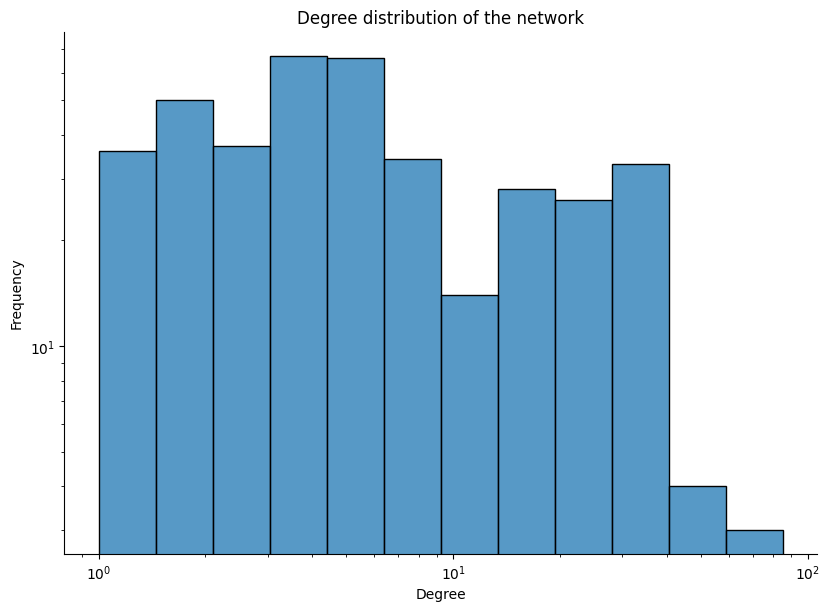

In [14]:
degree_distribution_list = [G.degree(node) for node in G]
dist_df = pd.DataFrame({'degree': degree_distribution_list})

sns.displot(dist_df['degree'], height=6, aspect=7/5, log_scale=(True, True)).set(
    xlabel='Degree',
    ylabel='Frequency',
    title=f'Degree distribution of the network'
)

To be sure that our conclusions are not based on biased visual interpretations, we measure how close our distribution is to a power law distribution by compute the scaling coefficient $\alpha$ as follows:

$$\alpha=1+n(\sum_i ln \frac{d_i}{d_{min}-1/2})^{-1}$$

Where:
- $n$ is the number of nodes in our network.
- $d_i$ is the degree of the node $i$.
- $d_{min}$ is the minimum degree found in our graph.

Finding an $\alpha$ value such that $2 \le \alpha \le 3$ means that our network is a scale free newtork.

In [15]:
degree_distribution_list = [G.degree(node) for node in G]

n = len(degree_distribution_list)
sum_val = sum(np.log(degree / (min(degree_distribution_list) - 1/2)) for degree in degree_distribution_list)

alpha = 1 + n * sum_val ** -1
alpha

1.4146050729309727

---

# Other measures

### Clustering

In [16]:
clustering = nx.clustering(G, weight="weight")
clustering_data = pd.DataFrame({"Name": list(clustering.keys()),
                        "Affiliation": [node_attributes[node] for node in clustering.keys()],
                        "Clustering": list(clustering.values())
                        }).sort_values(by="Clustering", ascending=False).reset_index(drop=True)
clustering_data


Name                                        Affiliation  \
0     MAMBELLI, FRANCESCA                                               None   
1          SCOPECE, FIORA            DIP. DI FILOLOGIA CLASSICA E MEDIOEVALE   
2          DIONIGI, IVANO  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
3        CITTI, FRANCESCO  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
4          PASETTI, LUCIA  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
..                    ...                                                ...   
393  GIANNINONI, RICCARDO          DIPARTIMENTO DI FILOSOFIA E COMUNICAZIONE   
394          CAINI, CARLO  DIPARTIMENTO DI INGEGNERIA DELL'ENERGIA ELETTR...   
395         DAVOLI, RENZO  DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...   
396     FALCHETTI, DENISE                  DIPARTIMENTO DI SCIENZE AZIENDALI   
397      MOCKUS, MARTYNAS                 DIPARTIMENTO DI SCIENZE GIURIDICHE   

     Clustering  
0      0.075970  
1      0.074737  
2      0.061562  
3      0.060264  
4      0.059982  
..          ...  
393    0.000000  
394    0.000000  
395    0.000000  
396    0.000000  
397    0.000000  

[398 rows x 3 columns]


Without Edge Weights:
REFORGIATO RECUPERO, DIEGO ANGELO: Clustering Coefficient = 1.0
STOPPELLI, PASQUALE: Clustering Coefficient = 1.0
GIACOMINI, FEDERICA: Clustering Coefficient = 1.0
MARTINEZ PANDIANI, DELFINA SOL: Clustering Coefficient = 1.0
BOLOGNESI, MARIANNA MARCELLA: Clustering Coefficient = 1.0
...
GODART, FREDERIC: Clustering Coefficient = 0.0
CAINI, CARLO: Clustering Coefficient = 0.0
MASTRONARDO, CLAUDIO: Clustering Coefficient = 0.0
GIULIANI, ANTONIO: Clustering Coefficient = 0.0
DE VIVO, MANUELA: Clustering Coefficient = 0.0


With Edge Weights:
MAMBELLI, FRANCESCA: Clustering Coefficient = 0.075970
SCOPECE, FIORA: Clustering Coefficient = 0.074737
DIONIGI, IVANO: Clustering Coefficient = 0.061562
CITTI, FRANCESCO: Clustering Coefficient = 0.060264
ZIOSI, ANTONIO: Clustering Coefficient = 0.059982
...
SOTTARA, DAVIDE: Clustering Coefficient = 0.0
D'ANGELO, GABRIELE: Clustering Coefficient = 0.0
CAPUCCINO, CARLOTTA: Clustering Coefficient = 0.0
PERRETTI, FABRIZIO: Clustering Coefficient = 0.0
DE VIVO, MANUELA: Clustering Coefficient = 0.0
Observations:
Node-Specific Clustering:

Without edge weights, certain nodes have a clustering coefficient of 1.0, indicating that every neighbor of these nodes is connected to each other.
With edge weights, clustering coefficients are more diverse and not necessarily maximal.
Impact of Edge Weights:

Nodes like MAMBELLI, FRANCESCA, SCOPECE, FIORA have non-zero clustering coefficients with edge weights, indicating that their neighbors are more likely to be connected to each other.
Nodes with Zero Clustering:

Nodes like SOTTARA, DAVIDE, D'ANGELO, GABRIELE, CAPUCCINO, CARLOTTA, PERRETTI, FABRIZIO, DE VIVO, MANUELA have zero clustering coefficients with and without edge weights, suggesting that their neighbors are less likely to form connections among themselves.
Change in Magnitude:

The magnitude of clustering coefficients can change with the introduction of edge weights.
In summary, the change in clustering coefficients when considering edge weights is a result of the weights influencing the likelihood and strength of connections between neighboring nodes. The impact will depend on the distribution and interpretation of edge weights in the specific context of the network. Nodes with strong connections, as indicated by lower weights, may exhibit higher clustering coefficients with edge weights. The introduction of weights adds a layer of complexity, allowing for a more nuanced analysis of connectivity patterns in the network.

In [17]:
avg_cohesion = nx.average_clustering(G)
print("Cohesion: ", avg_cohesion)

Cohesion:  0.7838469280463081


Average Clustering Coefficient (ACC):
The value 0.7838 suggests that, on average, the nodes in the graph tend to form cohesive groups. This coefficient is a measure of the density of triangles in the graph, indicating how much nodes tend to cluster together. A high average clustering coefficient implies that nodes in the graph are well-connected to their neighbors, forming local clusters or communities.

In [18]:
num_connected_components = nx.number_connected_components(G)
print("Connectedness: ", num_connected_components)

Connectedness:  6


Number of Connected Components:
The value 6 indicates that the graph has 6 connected components. A connected component is a subgraph in which there is a path between any two nodes. Having multiple connected components means that there are isolated groups of nodes in the graph. 

In [19]:
def calc_compactness(graph):
    shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(graph))

    total_compactness = 0
    total_pairs = 0

    for source, lengths in shortest_path_lengths.items():
        for target, distance in lengths.items():
            if source != target:
                total_compactness += 1 / distance
                total_pairs += 1

    if total_pairs == 0:
        return 0  # Avoid division by zero

    return total_compactness / total_pairs

compactness = calc_compactness(G)
print("Compactness: ", compactness)

Compactness:  0.33476433593827565


Compactness:
The value 0.33476433593824045 is the computed compactness for the given graph. Compactness is calculated as the reciprocal of the geodesic distance between pairs of nodes, this value suggests the following interpretation:
The compactness value lies between 0 and 1. Higher compactness values (closer to 1) indicate that nodes in the graph are more easily reachable from each other, potentially through shorter paths. Lower compactness values (closer to 0) suggest that the nodes are less easily reachable from each other, and there might be longer or more circuitous paths between them. The computed compactness value of approximately 0.355 indicates a moderate level of compactness. The reciprocal of the geodesic distances suggests that there are relatively shorter paths between pairs of nodes on average.

In [20]:
transitivity = nx.transitivity(G)
print("Transitivity: ", transitivity)

Transitivity:  0.6172535975124738


Transitivity:
A transitivity value of 0.657 suggests a relatively high level of clustering or transitive relationships within the graph, this value indicates that there are a substantial number of triangles or closed triads in the network. In simpler terms, if node A is connected to both node B and node C, there's a relatively high likelihood that nodes B and C are also directly connected to each other. This pattern of connectivity often reflects a clustering tendency in the network. The transitivity value ranges from 0 to 1, where 0 indicates no transitivity (no triangles or clustering), and 1 indicates maximum transitivity (all possible triangles are present). A value of 0.657 suggests that a significant portion of the graph's nodes are involved in triangles or closed triads, indicating a moderately high level of local clustering in the network.

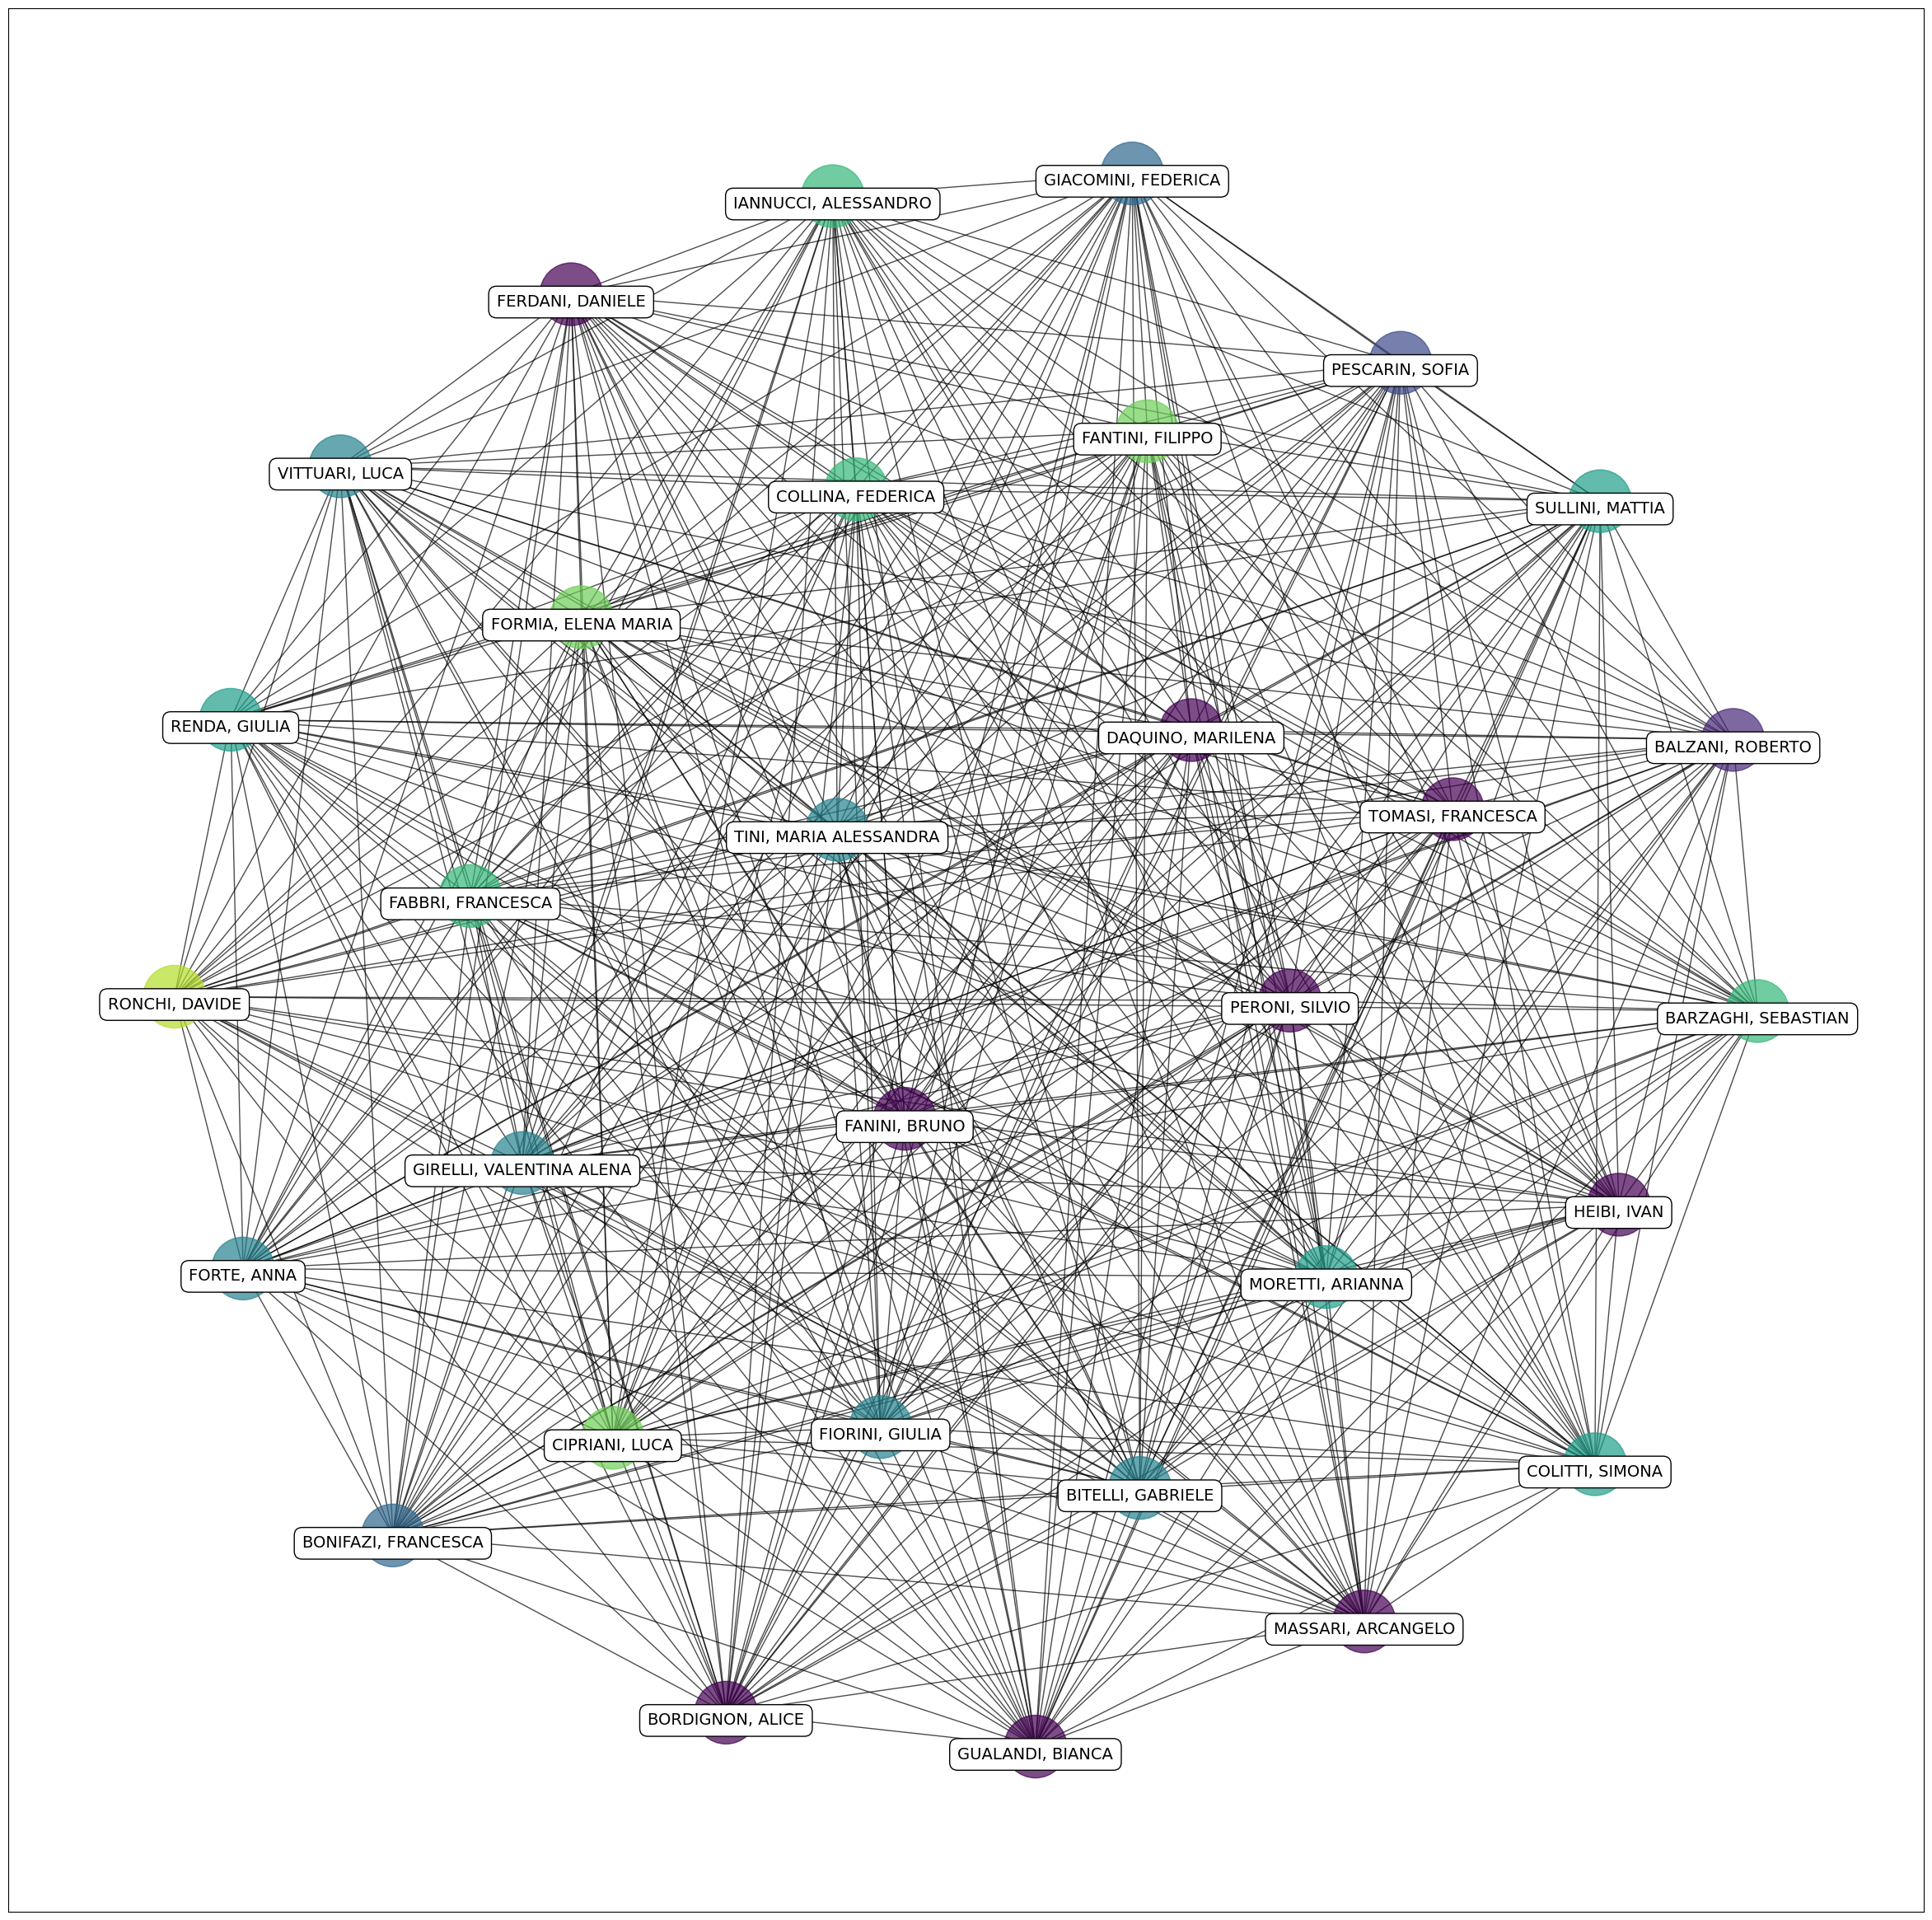

In [38]:

import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
import json
import pandas as pd
import numpy as np
import networkx as nx
from pprint import pprint
import matplotlib.pyplot as plt2
k_number = nx.k_core(G, None)

node_affiliations = nx.get_node_attributes(k_number, "affiliation")

unique_affiliations = set(node_affiliations.values())
node_labels = nx.get_node_attributes(k_number, "label")

norm = mcolors.Normalize(vmin=0, vmax=len(unique_affiliations))
scalar_map = ScalarMappable(norm=norm, cmap="viridis")
color_palette = {affiliation: scalar_map.to_rgba(i) for i, affiliation in enumerate(unique_affiliations)}

pos = nx.spring_layout(k_number, iterations=100, weight="weight", k=2)
plt.figure(figsize=(30, 30))

# Draw nodes with color, size, and labels for each node in the graph
node_sizes = [100 * k_number.degree(node) for node in k_number.nodes]
node_colors = [color_palette[node_affiliations[node]] for node in k_number.nodes]

nx.draw_networkx_nodes(k_number, pos, node_color=node_colors, node_size=node_sizes, alpha=0.7)
nx.draw_networkx_edges(k_number, pos, alpha=0.7)

# Initialize labels with empty strings for all nodes
labels = {node: node_labels[node] if node_labels.get(node) else '' for node in k_number.nodes}
bbox_props = {'boxstyle': 'round', 'facecolor': 'white', 'edgecolor': 'black', 'linewidth': 1, 'pad': 0.5, 'alpha': 1}

# Label nodes based on certain criteria (e.g., high degree centrality)
selected_nodes = [node for node, degree in k_number.degree() if degree > 10]
labels = {node: node for node in selected_nodes}
nx.draw_networkx_labels(k_number, pos, labels=labels, font_size=14, font_color='black', verticalalignment='top', bbox=bbox_props)

# Display the final graph
plt.show()

In [ ]:
core_number = nx.core_number(G)
k_data = pd.DataFrame.from_dict(core_number,
                                    columns=["KCore"],
                                    orient="index")
k_data.sort_values(by=["KCore"], ascending=False)

High Core Numbers:
Nodes like "RENDA, GIULIA," "TOMASI, FRANCESCA," "BITELLI, GABRIELE," etc., have a core number of 30. This indicates that these nodes are part of the 30-core, which means they are highly interconnected and form a central part of the network.

Uniform Core Numbers:
The fact that many nodes have the same core number (30) suggests a relatively homogeneous and densely connected region in the network. It could indicate a well-connected community or subgroup.

Low Core Numbers:
Nodes like "BENIGNI, FEDERICA," "SOTTARA, DAVIDE," "VAN HENTENRYCK, PASCAL RENÉ M.," etc., have a core number of 1. These nodes are less connected and likely part of the periphery of the network.

Network Structure:
The presence of both high and low core numbers suggests a hierarchical or modular structure in the network. The nodes with high core numbers form a cohesive core, while nodes with low core numbers are more on the outskirts or in less-connected regions.

Centrality and Importance:
Nodes with high core numbers are likely to be more central and play a more crucial role in connecting different parts of the network. Nodes with low core numbers may have more specialized or isolated roles.

In [40]:
# # communities = nx.community.louvain_communities(G)
# communities = nx.algorithms.community.greedy_modularity_communities(G)
# community_mapping = {}
# for i, community in enumerate(communities):
#     for node in community:
#         community_mapping[node] = i
        
# # pprint(len(communities))
# c_data = pd.DataFrame.from_dict(communities,
#                                     columns=["Communities"],
#                                     orient="index")
# c_data.sort_values(by=["Communities"], ascending=False)
# c_data

communities = nx.algorithms.community.greedy_modularity_communities(G, weight="weight")
community_mapping = {}
for i, community in enumerate(communities):
    for node in community:
        community_mapping[node] = i
        

c_data = pd.DataFrame.from_dict(community_mapping,
                                    columns=["Communities"],
                                    orient="index")
c_data.sort_values(by=["Communities"], ascending=False)


Communities
LILLO, FABRIZIO                       14
TRAPIN, LUCA                          14
CAPUCCINO, CARLOTTA                   13
IOVINE, GIULIO                        13
SABBA, FIAMMETTA                      12
...                                  ...
BONORA, PAOLO                          0
RUBINO, ROSSELLA                       0
BOETTO, ERIK                           0
ARASZKIEWICZ, MICHAL EDWARD            0
BINCOLETTO, GIORGIA                    0

[398 rows x 1 columns]

Community Sizes:
For each professor, the number next to their name represents the size of the community to which they belong. For example, "IOVINE, GIULIO" belongs to a community of size 13. The sizes of the communities vary, ranging from 13 to 0. Larger community sizes may indicate more cohesive or tightly connected groups within your network. Professors like "TURRINI, ELISA" and "SARTOR, GIOVANNI" belong to communities with zero size. This might imply that they are not part of any identified community according to the Greedy Modularity algorithm.

In [ ]:
G = dhdk_G
def homophily(G):
    num_same_ties = 0
    num_diff_ties = 0
    for n1, n2 in G.edges():
        if G.nodes[n1]['affiliation'] == G.nodes[n2]['affiliation']:
            num_same_ties += 1
        else:
            num_diff_ties += 1
    return (num_same_ties / (num_same_ties + num_diff_ties))
homophily(G)

NameError: name 'dhdk_G' is not defined

In [ ]:
ass = nx.attribute_assortativity_coefficient(G, "affiliation")
ass

0.15846437765621402

A homophily value of 0.3298041291688724 suggests a moderate level of homophily in your network. Homophily refers to the tendency of nodes with similar characteristics to be connected to each other in a network. The value ranges from 0 to 1, where:
0 indicates no homophily (nodes with similar characteristics are not more likely to be connected).
1 indicates perfect homophily (nodes with similar characteristics are always connected).

In [ ]:
prof_list = ['PERONI, SILVIO', 'TOMASI, FRANCESCA', 'VITALI, FABIO', 'PESCARIN, SOFIA', 'GANGEMI, ALDO', 'ITALIA, PAOLA MARIA CARMELA', 'TAMBURINI, FABIO', 'DAQUINO, MARILENA', 'GIALLORENZO, SAVERIO', 'ZUFFRANO, ANNAFELICIA', 'IOVINE, GIULIO', 'BARTOLINI, ILARIA', 'SPEDICATO, GIORGIO', 'PALMIRANI, MONICA', 'BASKAKOVA, EKATERINA', 'FERRIANI, SIMONE']
def affiliation_homophiliy(G, nodes):
    data = []
    for node in nodes:
        affiliation = G.nodes[node]['affiliation']
        neighbors = list(G.neighbors(node))
        total_connections = len(neighbors)
        connections_outside_affiliation = sum(1 for neighbor in neighbors if G.nodes[neighbor]['affiliation'] != affiliation)
        
        ratio = 0 if total_connections == 0 else round(connections_outside_affiliation / total_connections, 2)

        data.append([node, connections_outside_affiliation, affiliation, total_connections, ratio])

    df = pd.DataFrame(data, columns=['name', 'connections_outside_affiliation', 'affiliation', 'total_connections', 'ratio'])
    return df.sort_values(by=['ratio'], ascending=False)
print(affiliation_homophiliy(G, prof_list))


                           name  connections_outside_affiliation  \
3               PESCARIN, SOFIA                               33   
10               IOVINE, GIULIO                                1   
4                 GANGEMI, ALDO                               38   
0                PERONI, SILVIO                               61   
11            BARTOLINI, ILARIA                               37   
6              TAMBURINI, FABIO                               28   
7             DAQUINO, MARILENA                               32   
2                 VITALI, FABIO                               35   
13            PALMIRANI, MONICA                               25   
12           SPEDICATO, GIORGIO                                2   
1             TOMASI, FRANCESCA                               42   
8          GIALLORENZO, SAVERIO                               10   
9         ZUFFRANO, ANNAFELICIA                                2   
5   ITALIA, PAOLA MARIA CARMELA                 

Individual Professor Analysis:
Professors such as PESCARIN, SOFIA, GANGEMI, ALDO, PERONI, SILVIO, and BARTOLINI, ILARIA have relatively lower homophily ratios.

PESCARIN, SOFIA, for instance, has a homophily ratio of 0.29, indicating that about 29% of her connections are within her own department.
GANGEMI, ALDO, and PERONI, SILVIO, also have lower homophily ratios, suggesting a diverse set of connections across different departments.
Professors like BASKAKOVA, EKATERINA, FERRIANI, SIMONE, and SPEDICATO, GIORGIO have a homophily ratio of 0.0, indicating that all their connections are within their own department.

BASKAKOVA, EKATERINA, FERRIANI, SIMONE, and SPEDICATO, GIORGIO have a higher tendency to connect with colleagues from the same department.

Departmental Affiliations:
The departmental affiliations of professors play a significant role in determining the homophily ratios.
Professors from the same department are more likely to form connections with each other.
Homophily Variability:

There is variability in homophily ratios, indicating that different professors exhibit different degrees of homophily in their connections.

Impact of Affiliation:
Affiliation has a clear impact on the connectivity patterns within the network.
Professors from certain departments may have a higher likelihood of forming connections within their own department.
Network Diversity:

The network exhibits a certain degree of diversity, with some professors connecting across departments and others primarily connecting within their own department.